In [1]:
import pandas as pd
df = pd.read_csv('twitter_validation.csv')
df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [2]:
df = pd.read_csv('twitter_validation.csv', names=['iD','location','target','text'])
df


,iD,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
df.isna().sum()

iD          0
location    0
target      0
text        0
dtype: int64

In [4]:
df.dtypes

iD           int64
location    object
target      object
text        object
dtype: object

In [5]:
df.drop(['iD','location'],axis=1, inplace =True)
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
df['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

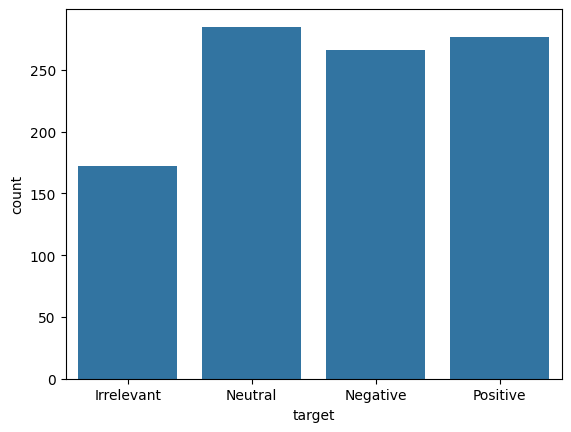

In [7]:
import seaborn as sns
sns.countplot(x='target',data=df)

In [8]:
# irrelevant is not needed.drop rows

df.drop(df.index[(df['target']=='Irrelevant')], axis=0, inplace=True)
df

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
df1 = df.loc[df['target']!='Irrelevant']           # another method to drop irelevant row.
df1

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
# indexing s not proper. so we need to correct it
df1.reset_index(drop=True,inplace=True)
df1

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
# set negative -1
# positive +1
# neutral 0


df1['target']=df1['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df1

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [12]:
tweets = df1.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [13]:
# remove special characters

import re
s = '15sjh msjd 632 @@@ $$ %%%%% mjkd *****'   # ***** will be replaced with @
r = re.sub("[^a-zA-Z0-9 ]+","@",s)
r

'15sjh msjd 632 @ @ @ mjkd @'

In [14]:
# [^a-zA-Z0-9 ] include space also
tweets = tweets.str.replace("[^a-zA-Z0-9 ]+", "", regex=True)

tweets

0      BBC News  Amazon boss Jeff Bezos rejects claim...
1      Microsoft Why do I pay for WORD when it functi...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp Ive had Madeleine McCann in my cella...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so its time to drink wine n play ...
826      Bought a fraction of Microsoft today Small wins
827    Johnson  Johnson to stop selling talc baby pow...
Name: text, Length: 828, dtype: object

In [15]:
# stemming

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk import TweetTokenizer
tk = TweetTokenizer()

tweets = tweets.apply(lambda line:[stemmer.stem(token.lower()) for token in tk.tokenize(line)]).apply(lambda token: " ".join(token)) # first lambda creates a list, 2nd lambda writes like a sentence
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it a t...
3      now the presid is slap american in the face th...
4      hi eahelp ive had madelein mccann in my cellar...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it time to drink wine n play bor...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: text, Length: 828, dtype: object

In [16]:
# remove stop words

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
sw


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiswa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
tweets = tweets.apply(lambda line:[token for token in tk.tokenize(line) if token not in sw]).apply(lambda token: " ".join(token))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp ive madelein mccann cellar past 13 y...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder us ...
Name: text, Length: 828, dtype: object

In [18]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vect = vectorizer.fit_transform(tweets)
print(vect)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10190 stored elements and shape (828, 4096)>
  Coords	Values
  (0, 693)	0.30444931436471556
  (0, 1146)	0.30444931436471556
  (0, 1277)	0.28688245905967213
  (0, 2195)	0.15709177095900126
  (0, 447)	0.2647508387565712
  (0, 1010)	0.20257552033302081
  (0, 949)	0.2647508387565712
  (0, 3054)	0.30444931436471556
  (0, 724)	0.30444931436471556
  (0, 2049)	0.28688245905967213
  (0, 782)	0.27441857686720666
  (0, 520)	0.18299317622979333
  (0, 2479)	0.23928486625711995
  (0, 692)	0.30444931436471556
  (1, 941)	0.4052090854499021
  (1, 3175)	0.4052090854499021
  (1, 2852)	0.3818283483730563
  (1, 1554)	0.4052090854499021
  (1, 4002)	0.36523945141691455
  (1, 2649)	0.31240246924634235
  (1, 3956)	0.26191944627409375
  (1, 2351)	0.24905209813650908
  (2, 1573)	0.17373491154744566
  (2, 642)	0.3681272347249391
  (2, 3736)	0.3681272347249391
  :	:
  (825, 3686)	0.25417047047308006
  (825, 780)	0.22986146346935857
  (825, 1142)	0.23166

In [19]:

# suppose there are features like f1,f2,f3------------------f4050
#   (0, 693) this means a word in 0th row lies in 693 col, and its corresponding value is 0.30444931436471556


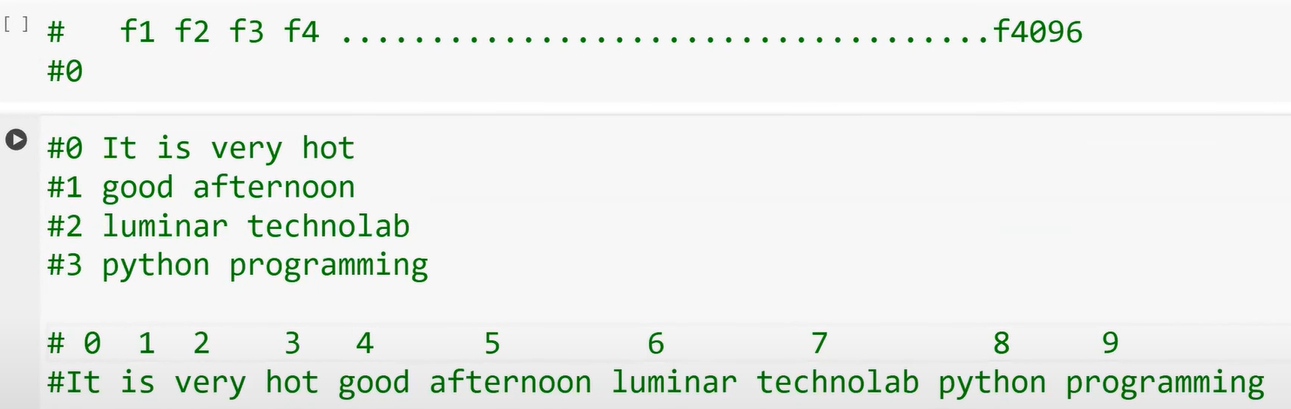

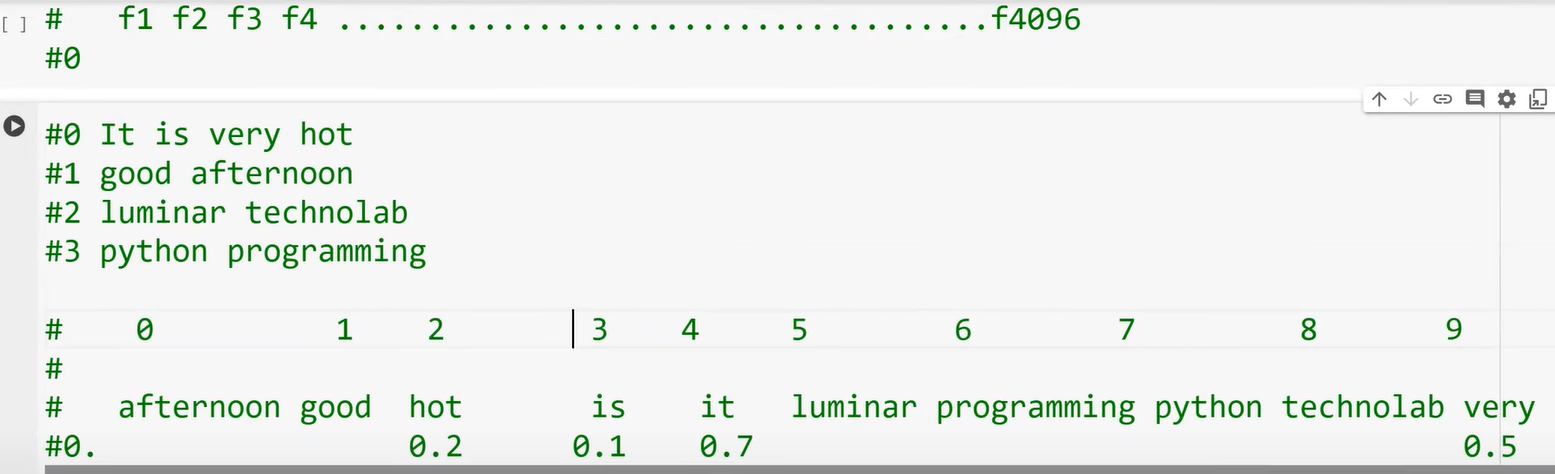

arranged in ascending order and corresponding values given. for the rest of the words values are 0

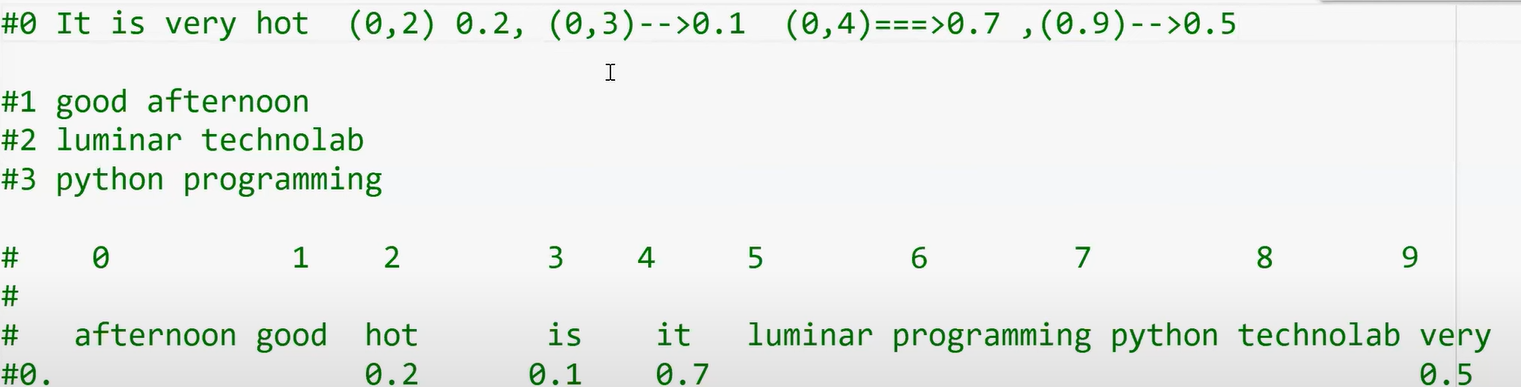

In [20]:
vect.shape

(828, 4096)

In [21]:
import numpy as np
X = vect.toarray()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
y = df1['target']
y

0      0
1     -1
2     -1
3      0
4     -1
      ..
823   -1
824    1
825    1
826    1
827    0
Name: target, Length: 828, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1,test_size=0.3)


In [24]:
# now using any algm build model
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [25]:
y_pred = sv.predict(X_test)
y_pred

array([ 0, -1,  0,  1, -1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
       -1, -1,  0,  1,  0,  0,  1, -1,  0,  0,  1, -1,  0,  1,  0,  0,  1,
       -1,  1, -1, -1, -1,  1,  0, -1,  0, -1, -1,  1,  0,  0,  0,  0,  0,
        0, -1, -1,  0, -1,  1,  0, -1,  0, -1,  0,  0,  0, -1,  1,  0,  1,
        0,  0,  1,  1,  0, -1,  0,  0,  1, -1, -1,  1,  0,  0, -1, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  1, -1,  0,  1, -1,  1,  1,  0, -1, -1,
       -1, -1,  0,  0, -1,  0,  1,  0,  0,  1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1,  1,  1,  1,  1,  0,  0, -1,  1,  0, -1, -1,  0,  0,  0, -1,
        1, -1,  0,  0, -1,  1,  0,  1,  0, -1,  1,  1,  0, -1,  0, -1,  0,
       -1,  1,  1,  0, -1,  1, -1,  1, -1,  0, -1, -1,  1,  0,  1,  0, -1,
        0,  0,  0, -1,  0, -1,  1,  0, -1, -1,  1, -1,  0,  0,  1, -1,  0,
        0,  1, -1,  0,  0,  1,  1, -1,  0, -1,  0,  1,  0, -1, -1,  0,  0,
        1,  1, -1,  0,  0,  0, -1,  0, -1,  0,  1, -1,  0,  0,  1,  0, -1,
        0,  0,  1,  0,  1

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.58      0.62      0.60        74
           0       0.55      0.67      0.61        91
           1       0.68      0.49      0.57        84

    accuracy                           0.59       249
   macro avg       0.61      0.59      0.59       249
weighted avg       0.61      0.59      0.59       249



In [27]:
# print confusion metrics also

In [28]:
y_new = sv.predict(vectorizer.transform(['csgo matchmak full closet hack truli aw game']).toarray())
y_new

array([-1], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(vect,y, random_state=1,test_size=0.3)


In [31]:
y_new = sv.predict(vectorizer.transform(['csgo matchmak full closet hack truli aw game']).toarray())
if y_new.item()==-1:
  print("negative")
elif y_new.item()==1:
  print("positiv")
else:
  print("nuetral")



negative
